In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\boytl\Desktop\continuous_factory_process.csv")
print(df.shape)

(14088, 116)


In [5]:
machine = "Machine"
Stage = "Stage"
filtered_columns = [col for col in df.columns if not machine in col]
filtered_columns[1:3]

['AmbientConditions.AmbientHumidity.U.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual']

Mean of machine data= 
 RawMaterial.Property1                    11.851256
RawMaterial.Property2                   205.676320
RawMaterial.Property3                   951.679815
RawMaterial.Property4                   248.868896
RawMaterialFeederParameter.U.Actual    1242.764276
Zone1Temperature.C.Actual                72.013330
Zone2Temperature.C.Actual                72.013106
MotorAmperage.U.Actual                   70.333111
MotorRPM.C.Actual                        11.072094
MaterialPressure.U.Actual               409.006724
MaterialTemperature.U.Actual             81.470000
ExitZoneTemperature.C.Actual             75.966161
dtype: float64


<Axes: >

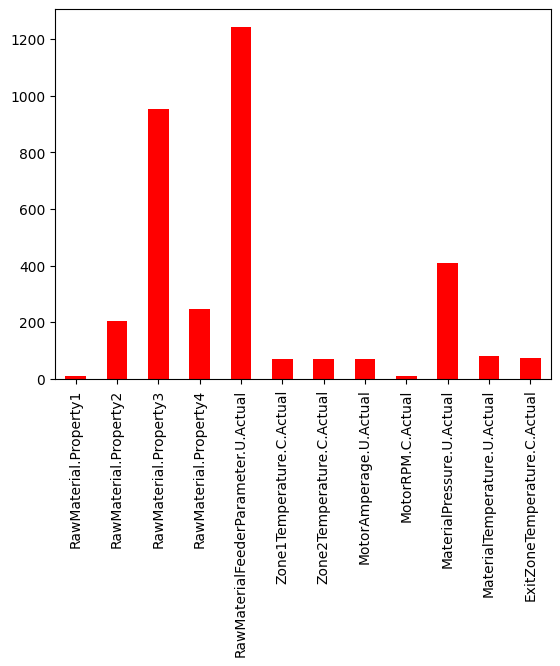

In [6]:
machine1_columns = [col for col in df.columns if col.startswith('Machine1')]
machine2_columns = [col for col in df.columns if col.startswith('Machine2')]
machine3_columns = [col for col in df.columns if col.startswith('Machine3')]

machine1_data = df[machine1_columns]
machine2_data = df[machine2_columns]
machine3_data = df[machine3_columns]

var = machine1_data.mean()
var.index = var.index.str.replace('Machine1.', '')
print("Mean of machine data= \n", var)

var.plot.bar(machine1_data, 20, color='red')

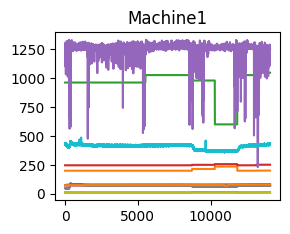

In [7]:
plt.subplot(221)
plt.title("Machine1")
plt.plot(machine1_data)

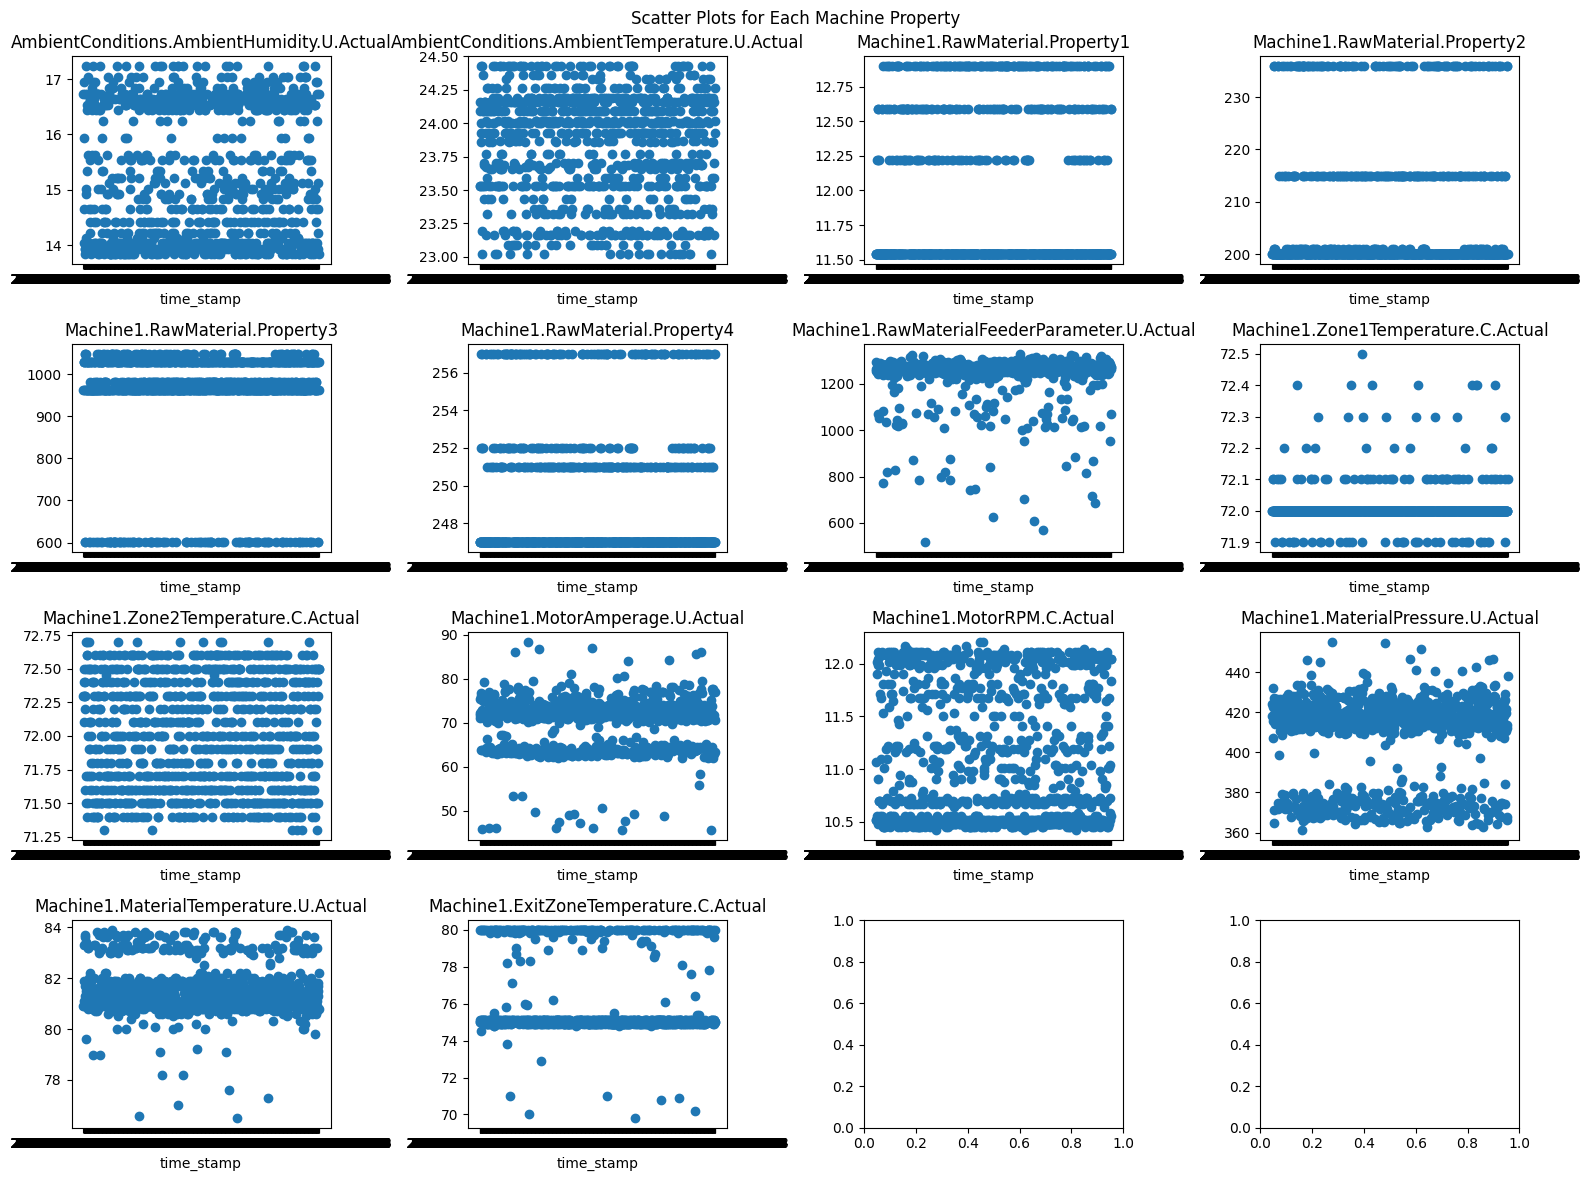

In [8]:
import matplotlib.pyplot as plt

sample_size = 1000  # Adjust the sample size as needed
sampled_df = df.sample(n=sample_size, random_state=42)
# Assuming the first column is the y-axis
y_label = df.columns[0]
y = sampled_df[y_label]

# Create a scatter plot for each machine property (limit to the first 14)
num_plots = min(14, len(sampled_df.columns) - 1)
fig, axes = plt.subplots(4, 4, figsize=(16, 12))  # Adjust the subplot layout based on your preference

for i, ax in enumerate(axes.flatten()[:num_plots]):
    column_name = sampled_df.columns[i + 1]
    machine_property = sampled_df[column_name]
    ax.scatter(y, machine_property, label=column_name)
    ax.set_title(column_name)
    ax.set_xlabel(y_label)

plt.suptitle('Scatter Plots for Each Machine Property')
plt.tight_layout()
plt.show()

$$
    r = \frac{\sum z_x \times z_y}{n-1}
$$
De $n-1$ term is de Bessel correctie en wordt gebruikt om $r$ **unbiased** te maken. 
Maar deze is niet nodig bij de berekening van de correlatie coefficient. 

In [23]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# Load your data
df = pd.read_csv(r"C:\Users\boytl\Desktop\continuous_factory_process.csv")  # Replace 'your_data.csv' with your actual file path or URL

y = df.iloc[:, 0]

# Create a scatter plot for each machine property (limit to the first 14)
num_plots = min(14, len(df.columns) - 1)
plt.figure(figsize=(16, 12))  # Adjust the figure size based on your preference

for i in range(1, num_plots + 1):
    column_name = df.columns[i]
    machine_property = df[column_name]

    plt.subplot(4, 4, i)  # Adjust the subplot layout based on your preference
    plt.scatter(y, machine_property, label=column_name)
    plt.title(column_name)

plt.suptitle('Scatter Plots for Each Machine Property')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Alternatieve berekeningen voor $r$:
\begin{align*}
    &r = \frac{\sum (x_i - \overline{\mathbf{x}}) (y_i - \overline{\mathbf{y}})}{\sqrt{\sum (x_i - \overline{\mathbf{x}})^2 \sum (y_i - \overline{\mathbf{y}})^2}}\\[2em]
    &r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
\end{align*}


In [ ]:
np.sum((x - x_mean) * (y - y_mean))/(np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2)))

NameError: name 'x_mean' is not defined

In [ ]:
covariance_matrix = np.cov(df, bias=True, rowvar=False)/(x_std*y_std)
covariance_matrix[0, 1]

0.6324555243639827

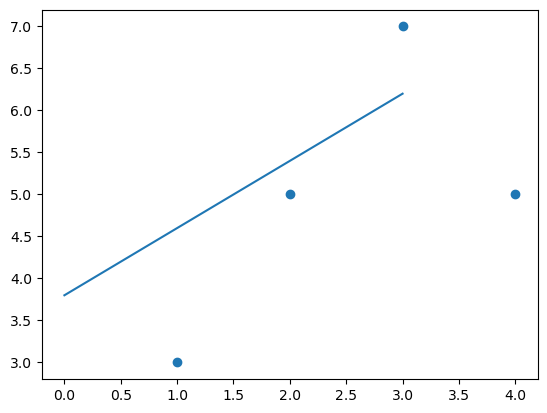

In [ ]:
b1 = r * y_std/x_std
b0 = y_mean-b1*x_mean

plt.scatter(x, y)

y_pred = [b1*xi + b0 for xi in range(1, 5)]

plt.plot(y_pred)

Root mean squared error:
$$
    RMSE = \sqrt{\frac{\sum_{i=1}^N (\hat{y_i} - y_i)^2}{N}}
$$

In [ ]:
df.shape

(4, 2)

In [ ]:
RMSE = np.sqrt(np.sum((y_pred - y)**2)/df.shape[0])
RMSE

1.0954451150103386

In [ ]:
# alternatieve berekening
np.sqrt(np.mean((y_pred - y)**2))

1.0954451150103386

Controleer en vergelijk met `LinearRegression` van sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(x.reshape(-1, 1), y)
(lin_reg.coef_, lin_reg.intercept_), (b1, b0)

((array([0.79999995], dtype=float32), 3.0),
 (0.7999998937908117, 3.0000002655229707))

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

cv = LeaveOneOut()
y_true = []
y_pred = []

for i, (train_index, test_index) in enumerate(cv.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    x_train = x[train_index].reshape(-1, 1)
    y_train = y[train_index]
    x_test = x[test_index].reshape(-1, 1)
    y_test = y[test_index]

    model = LinearRegression().fit(x_train, y_train)
    y_hat = model.predict(x_test)
    
    y_pred.append(y_hat[0])
    y_true.append(y_test[0])
    
mean_squared_error(y_true, y_pred)

Fold 0:
  Train: index=[1 2 3]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2 3]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1 3]
  Test:  index=[2]
Fold 3:
  Train: index=[0 1 2]
  Test:  index=[3]


7.1655326

Nu gaan we logistic regression toepassen

In [ ]:
from sklearn.datasets import load_breast_cancer

df_bc = load_breast_cancer(as_frame=True).frame
df_bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df_bc.isnull().values.any()

False

In [ ]:
from sklearn.model_selection import train_test_split

X = df_bc.iloc[:, :-1]
y = df_bc.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_proba = logit_reg.predict_proba(X_test)
y_pred = logit_reg.predict(X_test)

y_pred_proba, y_pred

(array([[5.92180841e-04, 9.99407819e-01],
        [2.24497242e-03, 9.97755028e-01],
        [9.99218619e-01, 7.81380923e-04],
        [9.99994316e-01, 5.68364873e-06],
        [9.99518018e-01, 4.81981825e-04],
        [7.74180999e-02, 9.22581900e-01],
        [4.32158911e-03, 9.95678411e-01],
        [9.99995057e-01, 4.94252131e-06],
        [1.97903679e-03, 9.98020963e-01],
        [5.34828616e-03, 9.94651714e-01],
        [1.01185605e-02, 9.89881440e-01],
        [9.99998100e-01, 1.90036215e-06],
        [7.48943139e-05, 9.99925106e-01],
        [1.33938670e-01, 8.66061330e-01],
        [4.74640202e-02, 9.52535980e-01],
        [4.09005316e-03, 9.95909947e-01],
        [1.37978775e-02, 9.86202123e-01],
        [3.36779506e-02, 9.66322049e-01],
        [1.18684523e-03, 9.98813155e-01],
        [2.57771330e-02, 9.74222867e-01],
        [9.16839159e-01, 8.31608414e-02],
        [5.62884595e-02, 9.43711541e-01],
        [9.99820007e-01, 1.79992663e-04],
        [9.99537263e-01, 4.6273668

In [ ]:
logit_reg_res = pd.DataFrame({
    'actual': y_test,
    'p(0)': y_pred_proba[:, 0].ravel(),
    'p(1)': y_pred_proba[:, 1].ravel(),
    'predicted': y_pred
})

logit_reg_res

,actual,p(0),p(1),predicted
234,1,0.000592,0.999408,1
429,1,0.002245,0.997755,1
274,0,0.999219,0.000781,0
87,0,0.999994,0.000006,0
15,0,0.999518,0.000482,0
...,...,...,...,...
187,1,0.004117,0.995883,1
293,1,0.005269,0.994731,1
354,1,0.001462,0.998538,1
286,1,0.057689,0.942311,1


(0.9861111111111112, 0.9285714285714286)

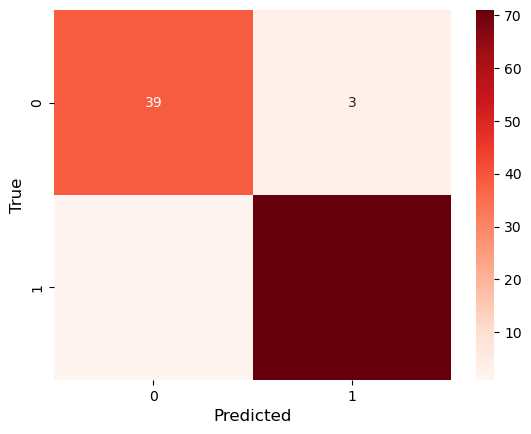

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(logit_reg_res['actual'], logit_reg_res['predicted'])
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)

sensitivity, specificity

FPR =  [0.         0.07142857 1.        ]
TPR =  [0.         0.98611111 1.        ]


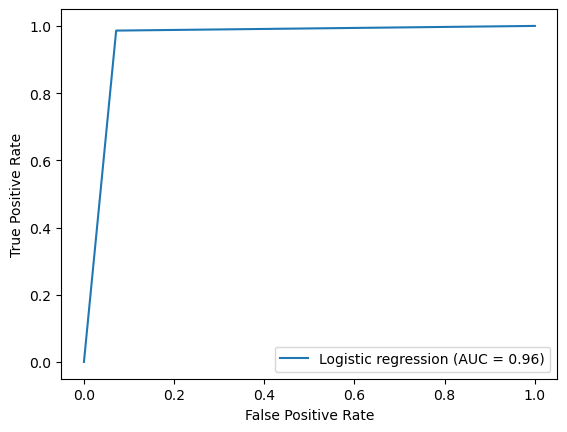

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, tresholds = roc_curve(logit_reg_res['actual'], logit_reg_res['predicted'], pos_label=1)

print("FPR = ", fpr)
print("TPR = ", tpr)

roc_auc = auc(fpr, tpr)

roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic regression')
roc_disp.plot()
plt.show()

Merk op

In [ ]:
(logit_reg_res['p(1)'] > 0.5)*1

450    1
267    1
212    0
517    0
459    1
      ..
102    1
477    1
200    1
543    1
162    0
Name: p(1), Length: 114, dtype: int64

In [ ]:
logit_reg_res['predicted']

234    1
429    1
274    0
87     0
15     0
      ..
187    1
293    1
354    1
286    1
220    1
Name: predicted, Length: 114, dtype: int64

Even wat anders

Train-test shapes: ((455, 1), (114, 1), (455,), (114,))
sensitivity=1.0
specificity=0.9285714285714286
cm=array([[39,  3],
       [ 0, 72]])


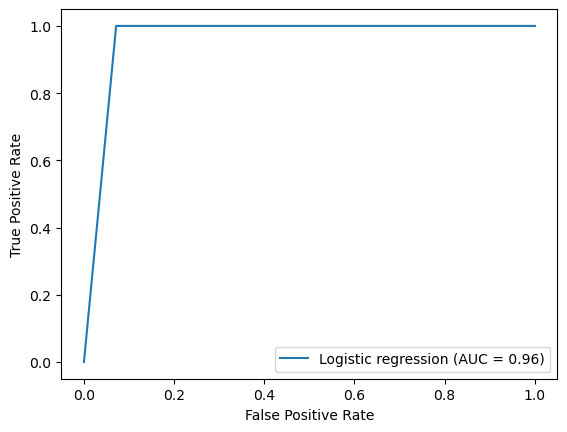

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df_bc = load_breast_cancer(as_frame=True).frame

df_lda = LinearDiscriminantAnalysis().fit_transform(df_bc.iloc[:, :-1], df_bc.iloc[:, -1])

X = df_lda
y = df_bc.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

print(f"Train-test shapes: {X_train.shape, X_test.shape, y_train.shape, y_test.shape}")

logit_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_proba = logit_reg.predict_proba(X_test)
y_pred = logit_reg.predict(X_test)

logit_reg_res = pd.DataFrame({
    'actual': y_test,
    'p(0)': y_pred_proba[:, 0].ravel(),
    'p(1)': y_pred_proba[:, 1].ravel(),
    'predicted': y_pred
})

cm = confusion_matrix(logit_reg_res['actual'], logit_reg_res['predicted'])

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)

print(f"{sensitivity=}")
print(f"{specificity=}")
print(f"{cm=}")

fpr, tpr, tresholds = roc_curve(logit_reg_res['actual'], logit_reg_res['predicted'], pos_label=1)
roc_auc = auc(fpr, tpr)
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic regression')
roc_disp.plot()
plt.show()